In [1]:
from dqn.dqn_base import ConcreteDQN
from dqn.dqn_memory import DQNWithMemory
from dqn.dqn_targetnn import DQNWithTargetNet
from dqn.neural_net import NeuralNetwork, NeuralNetworkForDueling
from dqn.memory import ExperienceReplay
import gymnasium as gym
import torch
import random
import matplotlib.pyplot as plt
plt.style.use('_mpl-gallery')

In [2]:
device = torch.device("cpu")

env = gym.make("CartPole-v0")

seed_value = 23
# env.seed(seed_value)
torch.manual_seed(seed_value)
random.seed(seed_value)

###### PARAMS ######
learning_rate = 0.005
num_episodes = 500
gamma = 0.9999

hidden_layer = 64

report_interval = 20
number_of_inputs = env.observation_space.shape[0]
number_of_outputs = env.action_space.n


/Users/meinczinger/.pyenv/versions/3.10.9/envs/rl/lib/python3.10/site-packages/gymnasium/envs/registration.py:577: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(


In [3]:
qnet_agent = ConcreteDQN(
    env,
    NeuralNetwork(number_of_inputs, hidden_layer, number_of_outputs).to(device),
    learning_rate,
    device,
    gamma,
)

qnet_agent_with_memory = DQNWithMemory(
    qnet_agent,
    ExperienceReplay(50000),
    32,
)

qnet_agent_with_targetnn = DQNWithTargetNet(
    qnet_agent,
    NeuralNetwork(number_of_inputs, hidden_layer, number_of_outputs).to(device),
)

qnet_agent_with_memory_and_targetnn = DQNWithTargetNet(
    qnet_agent_with_memory,
    NeuralNetwork(number_of_inputs, hidden_layer, number_of_outputs).to(device),
)

qnet_agent_with_memory_and_dueling = DQNWithTargetNet(
    qnet_agent_with_memory,
    NeuralNetworkForDueling(number_of_inputs, hidden_layer, number_of_outputs).to(
        device
    ),
)

In [6]:
nr_of_iterations = 500
ma_size = 20

dqn_base_steps = qnet_agent_with_memory_and_targetnn.learn(500, seed_value, report_interval)

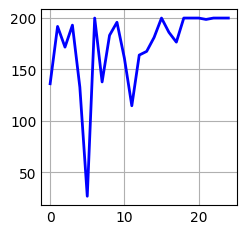

In [7]:

plt.plot(range(int(nr_of_iterations/ma_size)), [sum(dqn_base_steps[(i*ma_size):((i+1)*ma_size)])/ma_size for i in range(int(nr_of_iterations/ma_size))], linewidth=2.0, color='blue')
plt.show()